# Home credit default risk
we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:<br>

**Supervised:** The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.<br>
**Classification:** The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

## Importing key libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1-Getting to know data

In [3]:
# Loading data
app_train = pd.read_csv('application_train.csv')
app_train.shape

(307511, 122)

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv('application_test.csv')

In [6]:
app_test.shape

(48744, 121)

In [7]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The TARGET variable of the test set was hidden to evaluate the model built from train practice. The number of observations of train is about 6 times larger than that of train.

In [8]:
app_train['TARGET'][0:5]

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [9]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

**0 (will repay loan on time), 1 (will have difficulty repaying loan). In other words, 0 shows "Rapid" and 1 shows "Not Rapid" classes.<br> These are samples with imbalance which might create biaseness in results. We need to meet this challenge **

Repaid: 282686
Not repaid: 24825
Repaid: 91.93 %
Not repaid: 8.07 %


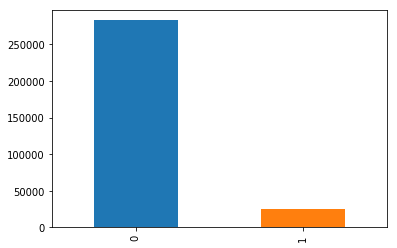

In [10]:
app_train['TARGET'].value_counts().plot.bar()
n_group = app_train['TARGET'].value_counts()
n_group_sum = n_group.sum()

print('Repaid: {}'.format(n_group[0]))
print('Not repaid: {}'.format(n_group[1]))

print('Repaid: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('Not repaid: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

## listing missing data, numeric and categorical data 

In [11]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
app_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [13]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(app_train)

No. of fields:  307511
No. of missing fields:  64


,No. of mising Value,%age of missing Value
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [14]:
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(app_train)
table_dtype

,Data Type
SK_ID_CURR,int64
FLAG_CONT_MOBILE,int64
FLAG_PHONE,int64
FLAG_EMAIL,int64
FLAG_DOCUMENT_9,int64
FLAG_DOCUMENT_8,int64
REGION_RATING_CLIENT,int64
REGION_RATING_CLIENT_W_CITY,int64
FLAG_DOCUMENT_7,int64
REG_REGION_NOT_LIVE_REGION,int64


In [15]:
table_dtype['Data Type'].value_counts()

float64    65
int64      41
object     16
Name: Data Type, dtype: int64

In [16]:
#Data in object form
app_train.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [17]:
#Statistics of the number of classes in each group for object data.
app_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**OCCUPATION_TYPE & ORGANIZATION_TYPE  will be taken separately due to the large number of classes**

In [18]:
dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]

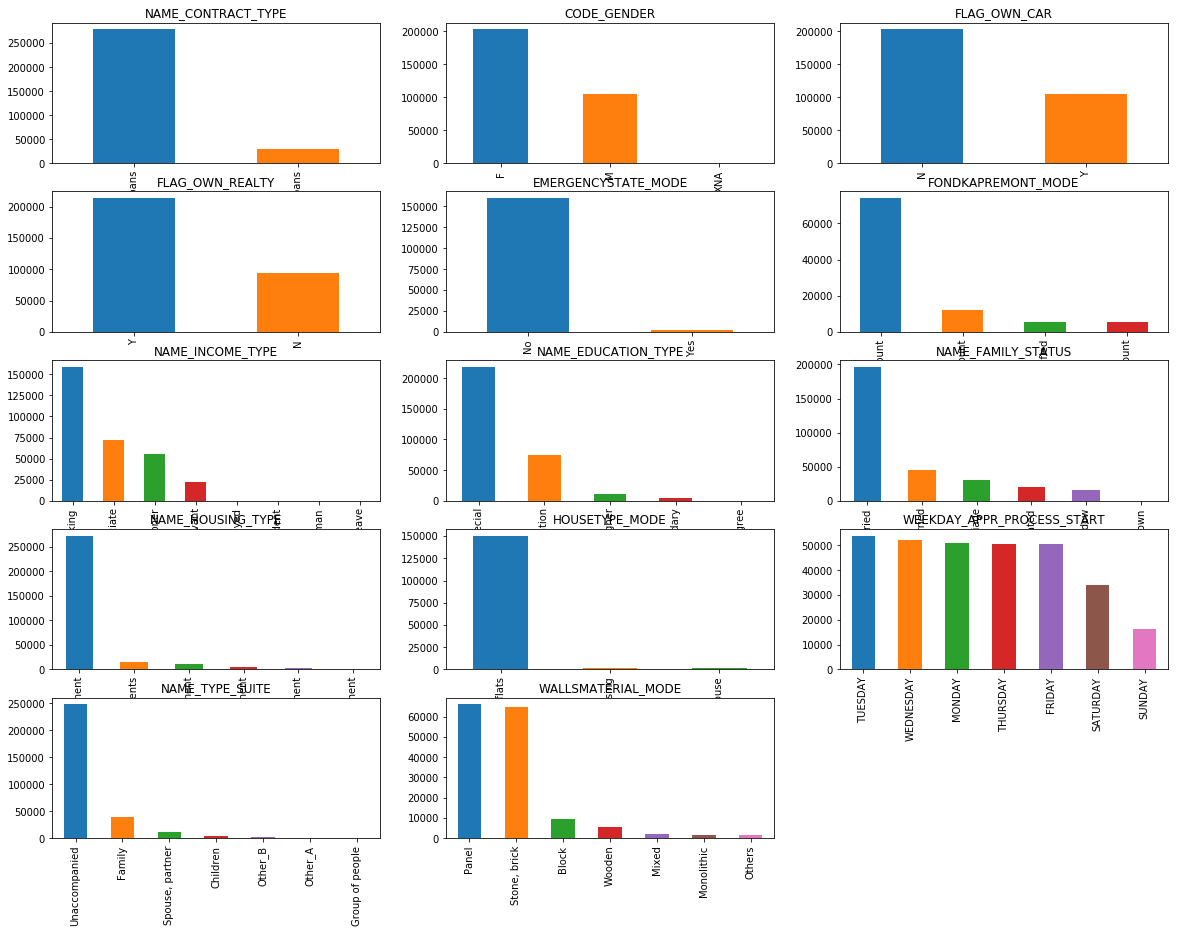

In [19]:
def _plot_bar_classes(cols):
    app_train[cols].value_counts().plot.bar()

plt.figure(figsize = (20, 15))    
for i in range(1, 15, 1):
    plt.subplot(5, 3, i)
    _plot_bar_classes(dtypes_object[i-1])
    plt.title(dtypes_object[i-1])

**Repaid / Not Repaid rate statistics follow object type forecast variables.**

In [20]:
def _per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    print(per_categorical)
    print('-------------------------------------\n')
    return per_categorical

for col in dtypes_object:
    _per_categorical(col)

NAME_CONTRACT_TYPE
Cash loans         10.981913
Revolving loans    17.253741
dtype: float64
-------------------------------------

CODE_GENDER
M       8.860066
F      13.287085
XNA          NaN
dtype: float64
-------------------------------------

FLAG_OWN_CAR
N    10.764392
Y    12.805042
dtype: float64
-------------------------------------

FLAG_OWN_REALTY
N    11.012114
Y    11.560325
dtype: float64
-------------------------------------

EMERGENCYSTATE_MODE
Yes     9.439462
No     13.357709
dtype: float64
-------------------------------------

FONDKAPREMONT_MODE
not specified            12.256410
reg oper account         13.330357
reg oper spec account    14.252525
org spec account         16.183486
dtype: float64
-------------------------------------

NAME_INCOME_TYPE
Maternity leave          1.500000
Unemployed               1.750000
Working                  9.429191
Commercial associate    12.361381
State servant           16.376301
Pensioner               17.565392
Businessman  

**Draw the Repaid / Not Repaid scale chart according to the object type forecast variables.**

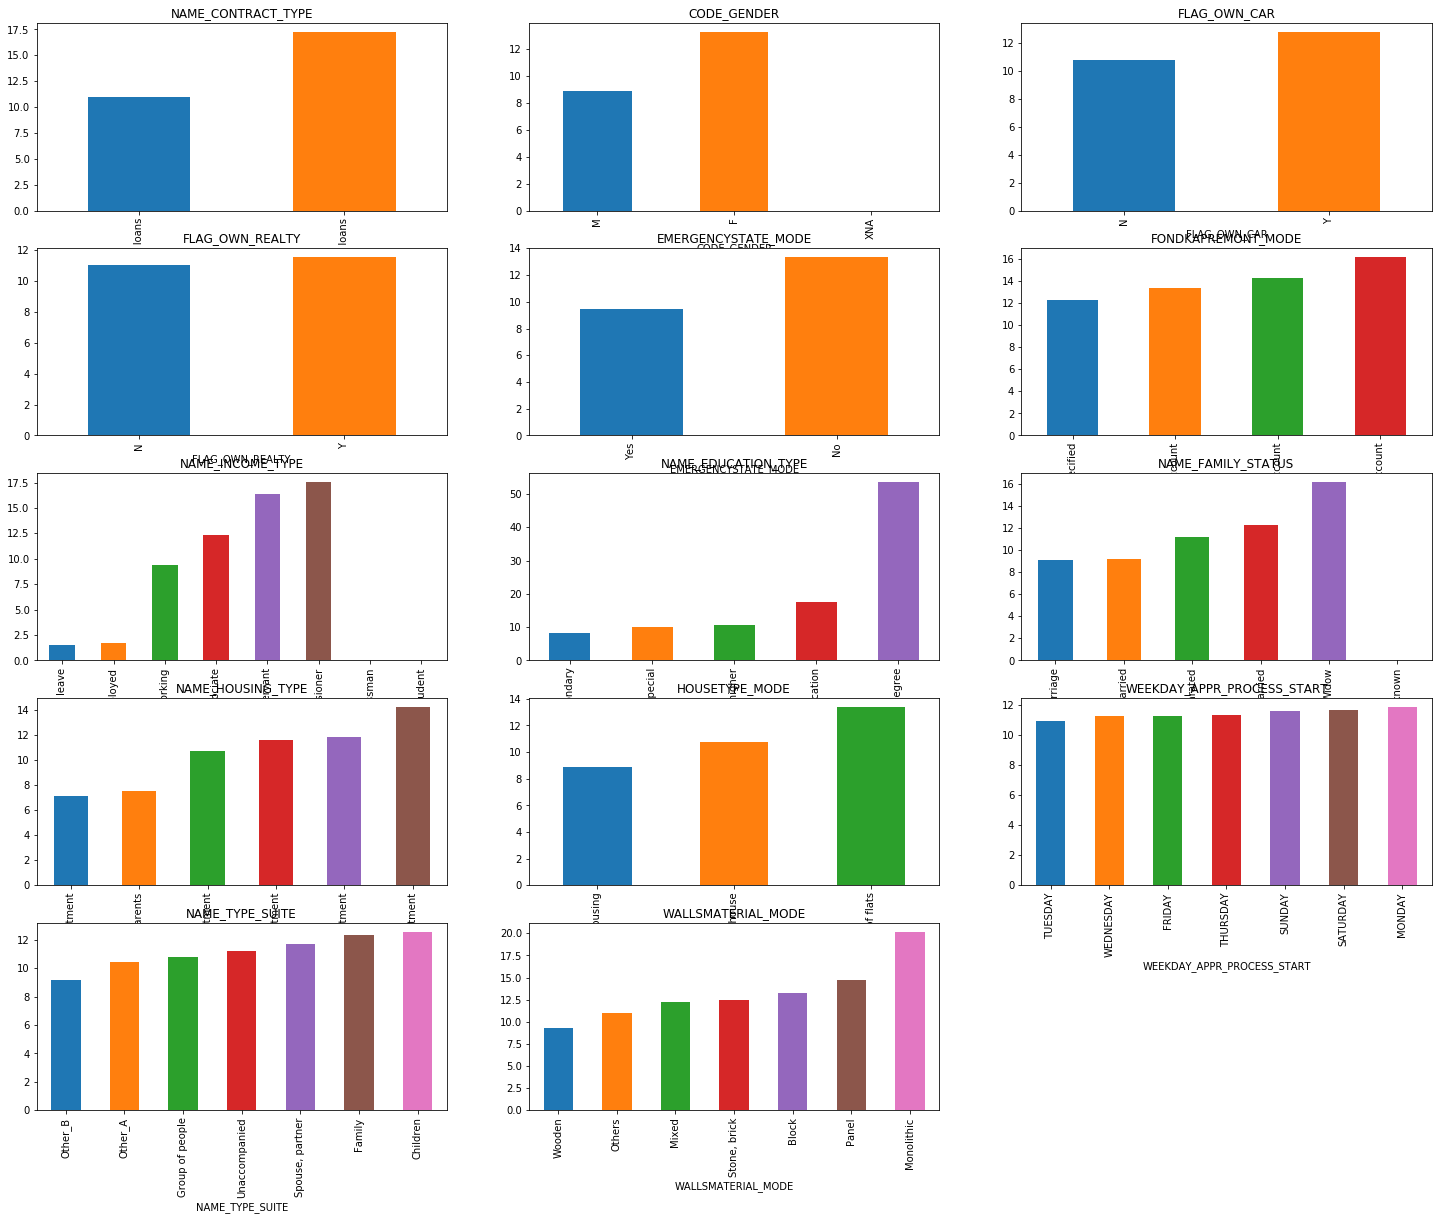

In [21]:
def _plot_per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    per_categorical.plot.bar()
    plt.title(col)
    return per_categorical

plt.figure(figsize = (25, 20))
i = 0
for col in dtypes_object:
    i += 1
    plt.subplot(5, 3, i)
    _plot_per_categorical(col)

**Through the graph, we also envision a few categorical variables that have big differences between large Repaid / Non Repaid rates such as NAME_CONTRACT_TYPE, GENDER, FLAG_OWN_REALITY, so these are variables that have a great impact on the target variable.**

Check separately for 2 variables ORGANIZATION_TYPE, OCCUPATION_TYPE**

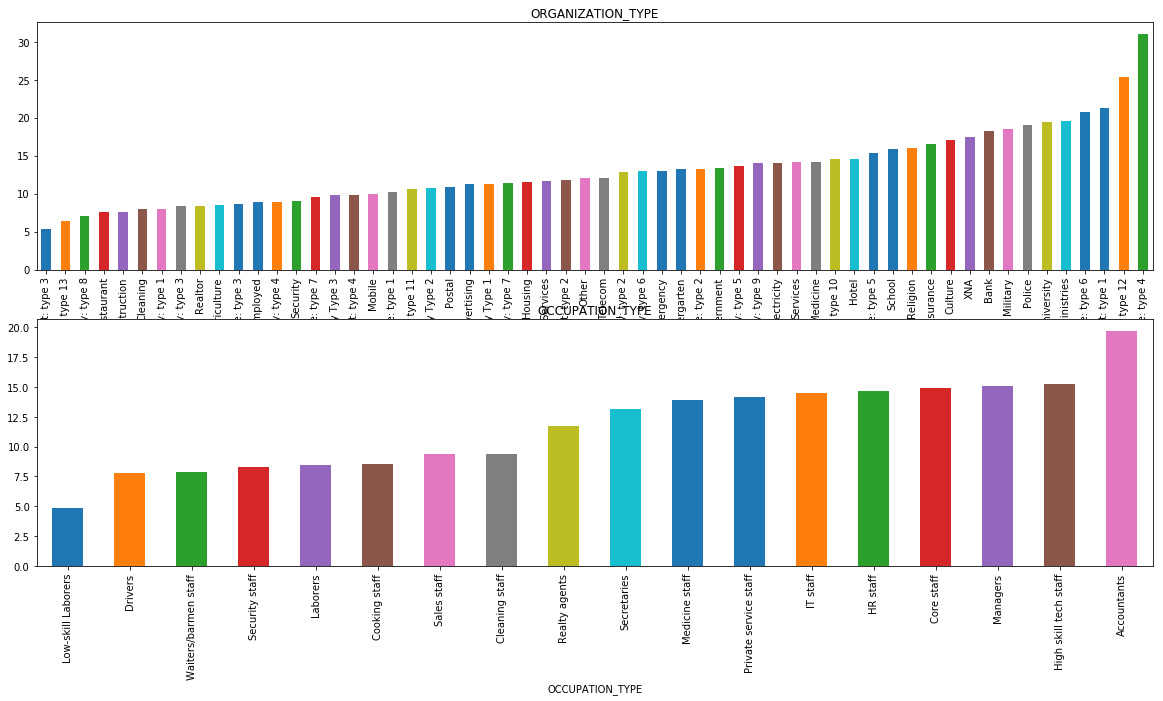

In [22]:
plt.figure(figsize = (20, 10))
i = 0
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

# 2 Group of Repaid / Not Repaid ratio features

To minimize the number of features, we can group the variables with Repaid / Not Repaid ratios nearly equal to a group because these groups have similar characteristics in contract classification.

In [23]:
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    _per_categorical(col)

ORGANIZATION_TYPE
Transport: type 3          5.347594
Industry: type 13          6.444444
Industry: type 8           7.000000
Restaurant                 7.542453
Construction               7.561783
Cleaning                   7.965517
Industry: type 1           8.034783
Industry: type 3           8.419540
Realtor                    8.428571
Agriculture                8.548638
Trade: type 3              8.673130
Self-employed              8.829069
Industry: type 4           8.853933
Security                   9.021605
Trade: type 7              9.582432
Business Entity Type 3     9.753124
Transport: type 4          9.774451
Mobile                     9.931034
Trade: type 1             10.225806
Industry: type 11         10.555556
Business Entity Type 2    10.725556
Postal                    10.851648
Advertising               11.257143
Business Entity Type 1    11.287474
Industry: type 7          11.447619
Housing                   11.587234
Legal Services            11.708333
Transport:

In [24]:
## Group equal value rates into 1 group by schedule_div.
def _devide_group(col, schedule_div = None, n_groups = 3, *kwargs):
    cols = []
    tbl_per_cat = _per_categorical(col)
    
    if schedule_div is None:
        n_cats = len(tbl_per_cat)
        n_val_incat = int(n_cats/n_groups)
        n_odd = n_cats - n_groups*n_val_incat

        for i in range(n_groups):
            if i == n_groups - 1:
                el = tbl_per_cat[(n_val_incat*i):(n_val_incat*(i+1)+n_odd)].index.tolist()
            else:
                el = tbl_per_cat[(n_val_incat*i):n_val_incat*(i+1)].index.tolist()    
            cols.append(el)
    else:
        idx = 0
        for n_cols in schedule_div:
            el_cols = tbl_per_cat[idx:(idx+n_cols)].index.tolist()
            cols.append(el_cols)
            idx += n_cols
                
    return cols



In [25]:
cols_OCCUPATION_TYPE = _devide_group(col = 'OCCUPATION_TYPE', schedule_div = [1, 7, 9, 1])
cols_OCCUPATION_TYPE

OCCUPATION_TYPE
Low-skill Laborers        4.830084
Drivers                   7.829141
Waiters/barmen staff      7.868421
Security staff            8.308864
Laborers                  8.452895
Cooking staff             8.574879
Sales staff               9.382277
Cleaning staff            9.409396
Realty agents            11.728814
Secretaries              13.184783
Medicine staff           13.924825
Private service staff    14.154286
IT staff                 14.470588
HR staff                 14.638889
Core staff               14.863061
Managers                 15.092620
High skill tech staff    15.233951
Accountants              19.702532
dtype: float64
-------------------------------------



[['Low-skill Laborers'],
 ['Drivers',
  'Waiters/barmen staff',
  'Security staff',
  'Laborers',
  'Cooking staff',
  'Sales staff',
  'Cleaning staff'],
 ['Realty agents',
  'Secretaries',
  'Medicine staff',
  'Private service staff',
  'IT staff',
  'HR staff',
  'Core staff',
  'Managers',
  'High skill tech staff'],
 ['Accountants']]

In [26]:
cols_ORGANIZATION_TYPE = _devide_group(col = 'ORGANIZATION_TYPE')
cols_ORGANIZATION_TYPE

ORGANIZATION_TYPE
Transport: type 3          5.347594
Industry: type 13          6.444444
Industry: type 8           7.000000
Restaurant                 7.542453
Construction               7.561783
Cleaning                   7.965517
Industry: type 1           8.034783
Industry: type 3           8.419540
Realtor                    8.428571
Agriculture                8.548638
Trade: type 3              8.673130
Self-employed              8.829069
Industry: type 4           8.853933
Security                   9.021605
Trade: type 7              9.582432
Business Entity Type 3     9.753124
Transport: type 4          9.774451
Mobile                     9.931034
Trade: type 1             10.225806
Industry: type 11         10.555556
Business Entity Type 2    10.725556
Postal                    10.851648
Advertising               11.257143
Business Entity Type 1    11.287474
Industry: type 7          11.447619
Housing                   11.587234
Legal Services            11.708333
Transport:

[['Transport: type 3',
  'Industry: type 13',
  'Industry: type 8',
  'Restaurant',
  'Construction',
  'Cleaning',
  'Industry: type 1',
  'Industry: type 3',
  'Realtor',
  'Agriculture',
  'Trade: type 3',
  'Self-employed',
  'Industry: type 4',
  'Security',
  'Trade: type 7',
  'Business Entity Type 3',
  'Transport: type 4',
  'Mobile',
  'Trade: type 1'],
 ['Industry: type 11',
  'Business Entity Type 2',
  'Postal',
  'Advertising',
  'Business Entity Type 1',
  'Industry: type 7',
  'Housing',
  'Legal Services',
  'Transport: type 2',
  'Other',
  'Telecom',
  'Industry: type 2',
  'Industry: type 6',
  'Emergency',
  'Kindergarten',
  'Trade: type 2',
  'Government',
  'Industry: type 5',
  'Industry: type 9'],
 ['Electricity',
  'Services',
  'Medicine',
  'Industry: type 10',
  'Hotel',
  'Trade: type 5',
  'School',
  'Religion',
  'Insurance',
  'Culture',
  'XNA',
  'Bank',
  'Military',
  'Police',
  'University',
  'Security Ministries',
  'Trade: type 6',
  'Transpo

**After grouping the features in a categorical variable into aggregate features, we need to update the data table fields according to the new features.**

In [27]:
def _map_lambda_cats(cols_list, colname, x): 
    cats = list(map(lambda x:colname + '_' + str(x), np.arange(len(cols_list)).tolist()))
    for i in range(len(cols_ORGANIZATION_TYPE)):
        if x in cols_list[i]:
            return cats[i]
        
def _map_cats(cols_list, colname, dataset):                    
    return list(map(lambda x: _map_lambda_cats(cols_list, colname, x), 
                    dataset[colname]))

app_train['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_train)
pd.Series.unique(app_train['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_0', 'ORGANIZATION_TYPE_2',
       'ORGANIZATION_TYPE_1'], dtype=object)

In [28]:
app_test['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_test)
pd.Series.unique(app_test['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_1', 'ORGANIZATION_TYPE_0',
       'ORGANIZATION_TYPE_2'], dtype=object)

### Reassign these variables with data after map

In [29]:
app_train['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_train)
app_test['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_test)

**After the above processing, data on app_train and app_test will be mapped according to the new classification groups. We can check the Repaid / No Repaid ratio of the new variable groups as below.**

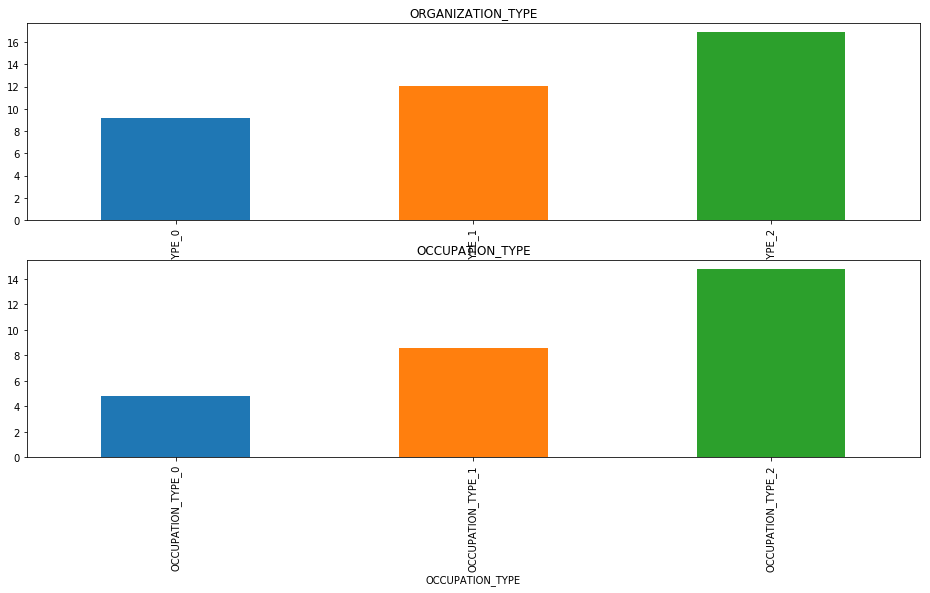

In [30]:
i = 0
plt.figure(figsize = (16, 8))
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

## Converting category variables into aggregate features

In [31]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [32]:
print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

app_train shape:  (307511, 176)
app_test shape:  (48744, 172)


**The number of variables has increased due to one-hot coding, but there is a difference between training and testing. Check the variables in app_train not in app_test**

In [33]:
for fea_name in app_train.columns:
    if fea_name not in app_test.columns:
        print(fea_name)

TARGET
CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown


These variables do not appear in the test set because some variables do not occur fully. We need to eliminate variables that are not in training. Only retrieve the variables included in both app_train and app_test

In [34]:
TARGET = app_train['TARGET']

In [35]:
## The command align by axis = 1 will retrieve fields that appear simultaneously in app_train and app_test
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

In [36]:
# After the align command the TARGET variable is lost, we need to reassign this variable
app_train['TARGET'] = TARGET

In [37]:
print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

app_train shape:  (307511, 173)
app_test shape:  (48744, 172)


# 3- Treating Outliers
In a data set there are often unusual observations. The cause may come from misidentified data, wrong data entry, special-observation observations, etc. The investigation of abnormal data can help discover some of data and at the same time correct the data in case of incorrect input. Checking abnormal data can be done by descriptive statistics.

In [38]:
app_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,1,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


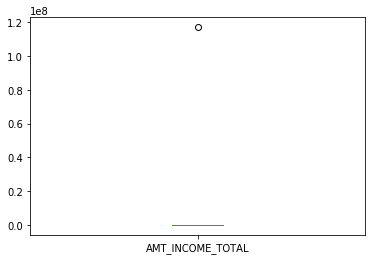

In [39]:
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

We find that income variable shows abnormal data when most quintiles of variables are low in origin 0 except for some special high cases. This shows that there is a difference in the income of borrowers.

In [40]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

The highest value of income is about 117 million USD while the average income is only 168 thousand USD. We will check the distribution of the TARGET variable according to the AMT_INCOME_TOTAL variable for the cases of Repaid and No repaid.

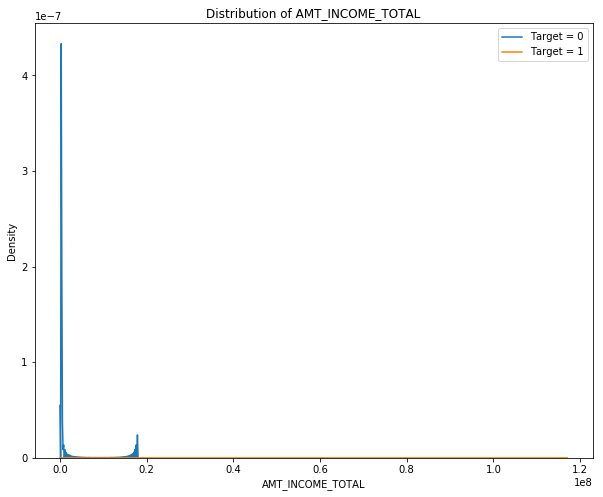

In [41]:
def _plot_density(colname):
    plt.figure(figsize = (10, 8))
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 0], label = 'Target = 0')
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 1], label = 'Target = 1')
    plt.xlabel(colname)
    plt.ylabel('Density')
    plt.title('Distribution of %s'%colname)

_plot_density('AMT_INCOME_TOTAL')

We need to regulate outliers in the range of permissible variations and reduces the deviation effect caused by them.

### 3 sigma method
This method is used to adjust the values outside the domain [[− 3σ, μ + 3σ] in that value domain. For values greater than μ + 3σ will be assigned with μ + 3σ and similar with a value less than μ − 3σ

In [42]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('FLAG_MOBIL', app_train, app_train)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 0.99
High value: 1.01


In [43]:
app_train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [44]:
# Statistics of different values in all variables
def _count_unique(x):
    return pd.Series.nunique(x)

tbl_dis_val = app_train.apply(_count_unique).sort_values(ascending = False)
tbl_dis_val[tbl_dis_val > 500]

SK_ID_CURR                307511
EXT_SOURCE_2              119831
EXT_SOURCE_1              114584
DAYS_BIRTH                 17460
DAYS_REGISTRATION          15688
AMT_ANNUITY                13672
DAYS_EMPLOYED              12574
DAYS_ID_PUBLISH             6168
AMT_CREDIT                  5603
LIVINGAREA_MODE             5301
LIVINGAREA_MEDI             5281
LIVINGAREA_AVG              5199
TOTALAREA_MODE              5116
BASEMENTAREA_MODE           3841
BASEMENTAREA_AVG            3780
DAYS_LAST_PHONE_CHANGE      3773
BASEMENTAREA_MEDI           3772
LANDAREA_MODE               3563
LANDAREA_MEDI               3560
LANDAREA_AVG                3527
NONLIVINGAREA_MODE          3327
NONLIVINGAREA_MEDI          3323
NONLIVINGAREA_AVG           3290
COMMONAREA_MEDI             3202
COMMONAREA_AVG              3181
COMMONAREA_MODE             3128
AMT_INCOME_TOTAL            2548
APARTMENTS_AVG              2339
LIVINGAPARTMENTS_AVG        1868
APARTMENTS_MEDI             1148
LIVINGAPAR

We consider variables with a different number of values> 500 as continuous variables. Apply the 3 sigma principle to these variables

In [45]:
cols_3sigma = tbl_dis_val[tbl_dis_val > 500].index.tolist()

In [46]:
# Remove the key variable SK_ID_CURR from the list
cols_3sigma = cols_3sigma[1:]

In [47]:
# Remove outlier by 3 sigma
for col in cols_3sigma:
    print(col)
    app_train[col] = _zoom_3sigma(col, app_train, app_train) 
    print('------------------------\n')

EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.06
High value: 1.09
------------------------

EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.13
High value: 1.14
------------------------

DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29128.96
High value: -2945.03
------------------------

DAYS_REGISTRATION
Percentage of low: 0.24%
Percentage of high: 0.00%
Low value: -15554.78
High value: 5582.54
------------------------

AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 0.96%
Low value: -16372.64
High value: 70589.79
------------------------

DAYS_EMPLOYED
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -360012.25
High value: 487642.35
------------------------

DAYS_ID_PUBLISH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -7522.55
High value: 1534.15
------------------------

AMT_CREDIT
Percentage of low: 0.00%
Percentage of high: 1.06%
Low value: -608446.33
Hig

In [48]:
# Same for test set
for col in cols_3sigma:
    print(col)
    app_test[col] = _zoom_3sigma(col, app_test, app_test) 
    print('------------------------\n')

EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.03
High value: 1.06
------------------------

EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.11
High value: 1.12
------------------------

DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29045.79
High value: -3090.38
------------------------

DAYS_REGISTRATION
Percentage of low: 0.25%
Percentage of high: 0.00%
Low value: -15625.49
High value: 5690.18
------------------------

AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 1.04%
Low value: -18622.86
High value: 77475.35
------------------------

DAYS_EMPLOYED
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -365560.16
High value: 500530.89
------------------------

DAYS_ID_PUBLISH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -7759.54
High value: 1656.12
------------------------

AMT_CREDIT
Percentage of low: 0.00%
Percentage of high: 2.32%
Low value: -579450.58
Hig

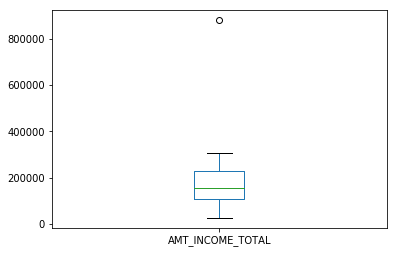

In [49]:
# Re-check AMT_INCOME_TOTAL variable after removing outlier
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

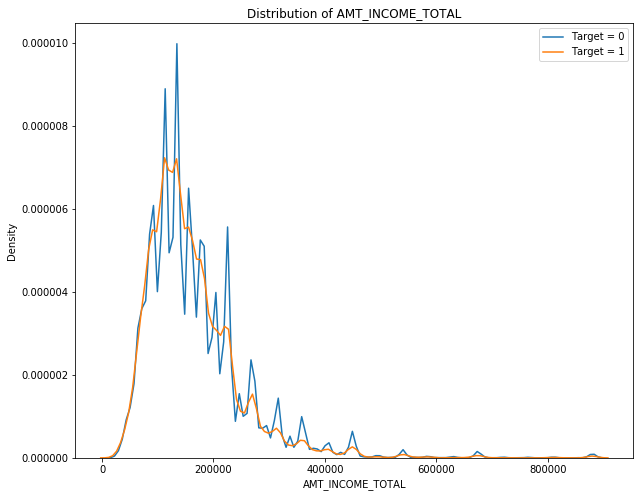

In [50]:
_plot_density('AMT_INCOME_TOTAL')

Thus, after removing oulier, the distribution graph of AMT_INCOME_TOTAL is no longer biased. The landmarks Q1, Q2, Q3, Q4 in quintiles have not been too small compared to the largest values in the original box plot chart. The density function diagram also shows that a distribution does not have the difference values as before adjustment.

# 4- Missing Values
 We will apply MinMaxScaler to standardize the predictor variable and use the mean to handle missing data.

In [51]:
from sklearn.preprocessing import MinMaxScaler, Imputer

if 'TARGET' in app_train.columns:
    TARGET = app_train.pop('TARGET')
    
# Assign train and test to app_train and app_test; train and test are used to scale data

train = app_train
test = app_test

# Initialize in compute method according to the average method

inputer = Imputer(strategy = 'mean')
inputer.fit(train)

# Enter NA values as average
train = inputer.transform(train)
test = inputer.transform(test)

# Initialize the scaler with the MinMaxScaler method in the range [-1, 1]
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler.fit(train)

# Scale data on train and test
train = scaler.transform(train)
test = scaler.transform(test)

# Remove the first column SK_ID_CURR because this column is a key. When needed to get from app_train and app_test
train = train[:, 1:]
test = test[:, 1:]

In [52]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (307511, 171)
test shape:  (48744, 171)


# 5- Model

In [53]:
# Checking correlation
app_train['TARGET'] = TARGET
corr_tbl = app_train.corr()
corr_tbl

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
SK_ID_CURR,1.000000,-0.001129,0.001241,-0.000640,0.000158,-0.000400,0.000849,-0.001500,0.001366,-0.000981,...,0.002073,-0.000976,0.000072,-0.001396,0.002300,-0.001281,-0.000270,0.000510,0.002549,-0.002108
CNT_CHILDREN,-0.001129,1.000000,0.028804,0.002176,0.021989,-0.001818,-0.025573,0.330938,-0.239818,0.183493,...,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-0.025088,0.011036,-0.038644,0.004525,0.019187
AMT_INCOME_TOTAL,0.001241,0.028804,1.000000,0.391366,0.467469,0.397909,0.192516,0.066118,-0.161282,0.072306,...,0.031085,0.016000,0.059624,0.010309,0.086771,0.034721,-0.008373,0.125421,-0.006935,-0.023080
AMT_CREDIT,-0.000640,0.002176,0.391366,1.000000,0.787336,0.986930,0.097395,-0.056839,-0.067296,0.008917,...,0.013845,0.007781,0.026075,0.005733,0.046243,0.009076,-0.007031,0.057087,-0.003980,-0.029956
AMT_ANNUITY,0.000158,0.021989,0.467469,0.787336,1.000000,0.790757,0.117087,0.011231,-0.108718,0.039933,...,0.015337,0.009319,0.033467,0.006309,0.055625,0.008508,-0.007217,0.067956,-0.003799,-0.011050
AMT_GOODS_PRICE,-0.000400,-0.001818,0.397909,0.986930,0.790757,1.000000,0.101775,-0.055186,-0.065434,0.010738,...,0.013185,0.009638,0.027016,0.005886,0.049470,0.012039,-0.008896,0.061621,-0.004531,-0.039445
REGION_POPULATION_RELATIVE,0.000849,-0.025573,0.192516,0.097395,0.117087,0.101775,1.000000,-0.029582,-0.003980,-0.053724,...,0.078062,0.016288,0.045775,0.013435,0.092652,0.010782,-0.056263,0.103513,-0.029932,-0.037227
DAYS_BIRTH,-0.001500,0.330938,0.066118,-0.056839,0.011231,-0.055186,-0.029582,1.000000,-0.615864,0.331721,...,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-0.010964,0.008758,-0.019852,0.005434,0.078239
DAYS_EMPLOYED,0.001366,-0.239818,-0.161282,-0.067296,-0.108718,-0.065434,-0.003980,-0.615864,1.000000,-0.209978,...,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-0.006327,-0.002846,-0.010907,-0.003571,-0.044932
DAYS_REGISTRATION,-0.000981,0.183493,0.072306,0.008917,0.039933,0.010738,-0.053724,0.331721,-0.209978,1.000000,...,-0.010996,0.015198,0.051301,-0.000709,-0.066979,-0.023324,0.000076,-0.069196,-0.006320,0.041979


In [54]:
corr_tbl['TARGET'].sort_values()

EXT_SOURCE_3                                        -0.178919
EXT_SOURCE_2                                        -0.160472
EXT_SOURCE_1                                        -0.155317
ORGANIZATION_TYPE_ORGANIZATION_TYPE_2               -0.059806
NAME_EDUCATION_TYPE_Higher education                -0.056593
CODE_GENDER_F                                       -0.054704
NAME_INCOME_TYPE_Pensioner                          -0.046209
DAYS_EMPLOYED                                       -0.044932
FLOORSMAX_AVG                                       -0.044003
FLOORSMAX_MEDI                                      -0.043768
FLOORSMAX_MODE                                      -0.043226
EMERGENCYSTATE_MODE_No                              -0.042201
HOUSETYPE_MODE_block of flats                       -0.040594
AMT_GOODS_PRICE                                     -0.039445
REGION_POPULATION_RELATIVE                          -0.037227
OCCUPATION_TYPE_OCCUPATION_TYPE_2                   -0.035966
LIVINGAR

We can use np.corrcoef (arr) function to calculate the correlation matrix for variables. However correlation calculations on numpy need more resources than pandas.

In [55]:
pd_train = pd.DataFrame(train, columns = app_train.columns[1:-1])
pd_train['TARGET'] = TARGET
pd_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,-1.0,-0.586082,-0.589443,-0.330620,-0.613382,-0.487358,0.777678,-0.909828,0.530948,0.410866,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1
1,-1.0,-0.428098,0.417546,-0.011719,0.355965,-0.909967,-0.045772,-0.912704,0.847507,0.919133,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0
2,-1.0,-0.902050,-0.897814,-0.851118,-0.882334,-0.730206,-0.302931,-0.907677,0.452258,0.296651,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
3,-1.0,-0.744066,-0.696074,-0.186044,-0.680620,-0.785954,-0.298309,-0.922366,-0.264306,0.322773,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,-1.0,-0.775663,-0.468634,-0.412825,-0.411668,-0.214240,-0.402818,-0.922360,0.445701,0.039044,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [56]:
corr_tbl_train = pd_train.corr()
corr_tbl_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
CNT_CHILDREN,1.000000,0.028804,0.002176,0.021989,-0.001817,-0.025573,0.330938,-0.239818,0.183493,-0.028019,...,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-0.025088,0.011036,-0.038644,0.004525,0.019187
AMT_INCOME_TOTAL,0.028804,1.000000,0.391366,0.467464,0.397746,0.192516,0.066118,-0.161282,0.072306,0.024652,...,0.031085,0.016000,0.059624,0.010309,0.086771,0.034721,-0.008373,0.125421,-0.006935,-0.023080
AMT_CREDIT,0.002176,0.391366,1.000000,0.787323,0.986532,0.097395,-0.056839,-0.067296,0.008917,-0.006442,...,0.013845,0.007781,0.026075,0.005733,0.046243,0.009076,-0.007031,0.057087,-0.003980,-0.029956
AMT_ANNUITY,0.021989,0.467464,0.787323,1.000000,0.790253,0.117081,0.011231,-0.108717,0.039932,0.013045,...,0.015337,0.009319,0.033467,0.006309,0.055624,0.008507,-0.007217,0.067955,-0.003799,-0.011050
AMT_GOODS_PRICE,-0.001817,0.397746,0.986532,0.790253,1.000000,0.101738,-0.055160,-0.065417,0.010734,-0.009033,...,0.013176,0.009635,0.027001,0.005886,0.049452,0.012034,-0.008889,0.061593,-0.004529,-0.039428
REGION_POPULATION_RELATIVE,-0.025573,0.192516,0.097395,0.117081,0.101738,1.000000,-0.029582,-0.003980,-0.053724,-0.003993,...,0.078062,0.016288,0.045775,0.013435,0.092652,0.010782,-0.056263,0.103513,-0.029932,-0.037227
DAYS_BIRTH,0.330938,0.066118,-0.056839,0.011231,-0.055160,-0.029582,1.000000,-0.615864,0.331721,0.272691,...,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-0.010964,0.008758,-0.019852,0.005434,0.078239
DAYS_EMPLOYED,-0.239818,-0.161282,-0.067296,-0.108717,-0.065417,-0.003980,-0.615864,1.000000,-0.209978,-0.272378,...,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-0.006327,-0.002846,-0.010907,-0.003571,-0.044932
DAYS_REGISTRATION,0.183493,0.072306,0.008917,0.039932,0.010734,-0.053724,0.331721,-0.209978,1.000000,0.101864,...,-0.010996,0.015198,0.051301,-0.000709,-0.066979,-0.023324,0.000076,-0.069196,-0.006320,0.041979
DAYS_ID_PUBLISH,-0.028019,0.024652,-0.006442,0.013045,-0.009033,-0.003993,0.272691,-0.272378,0.101864,1.000000,...,-0.003078,-0.001923,0.002270,0.001326,-0.015459,-0.005677,0.012702,-0.015230,0.006851,0.051457


The degree of correlation of variables will be ranked relative based on their absolute value. The evaluation intervals are as follows:<br>
0-0.19: Very weak.<br>
0.2-0.39: Weak.<br>
0.4-0.59: Average.<br>
0.6-0.79: High.<br>
0.8-1: Very high.<br>
Based on the correlation coefficient table, we can find variables that are strongly related to the TARGET variable.

In [57]:
corr_tbl_train['TARGET'].sort_values()

EXT_SOURCE_2                                        -0.160303
EXT_SOURCE_3                                        -0.157397
EXT_SOURCE_1                                        -0.099152
ORGANIZATION_TYPE_ORGANIZATION_TYPE_2               -0.059806
NAME_EDUCATION_TYPE_Higher education                -0.056593
CODE_GENDER_F                                       -0.054704
NAME_INCOME_TYPE_Pensioner                          -0.046209
DAYS_EMPLOYED                                       -0.044932
EMERGENCYSTATE_MODE_No                              -0.042201
HOUSETYPE_MODE_block of flats                       -0.040594
AMT_GOODS_PRICE                                     -0.039428
REGION_POPULATION_RELATIVE                          -0.037227
OCCUPATION_TYPE_OCCUPATION_TYPE_2                   -0.035966
WALLSMATERIAL_MODE_Panel                            -0.033119
NAME_CONTRACT_TYPE_Revolving loans                  -0.030896
AMT_CREDIT                                          -0.029956
FLOORSMA

There are too many variables. It's tough to read all so, **Select 15 variables** that have the greatest correlation with the target variable and represent their correlation matrix.

In [58]:
cols_corr_15 = np.abs(corr_tbl_train['TARGET']).sort_values()[-16:].index.tolist()

In [59]:
# Calculate the correlation matrix
cols_tbl_15 = pd_train[cols_corr_15].corr()

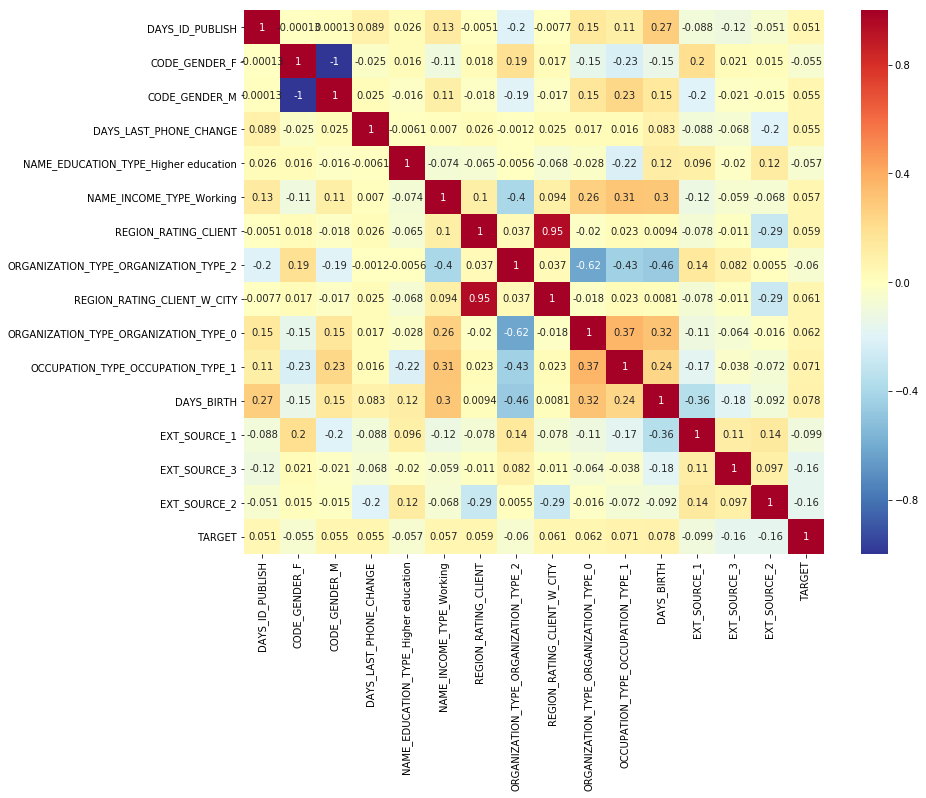

In [60]:
#show on heatmap chart
plt.figure(figsize = (13, 10))
sns.heatmap(cols_tbl_15, cmap = plt.cm.RdYlBu_r, annot = True)

Distribute the probability of variables in groups of target variables.

<Figure size 1440x360 with 0 Axes>

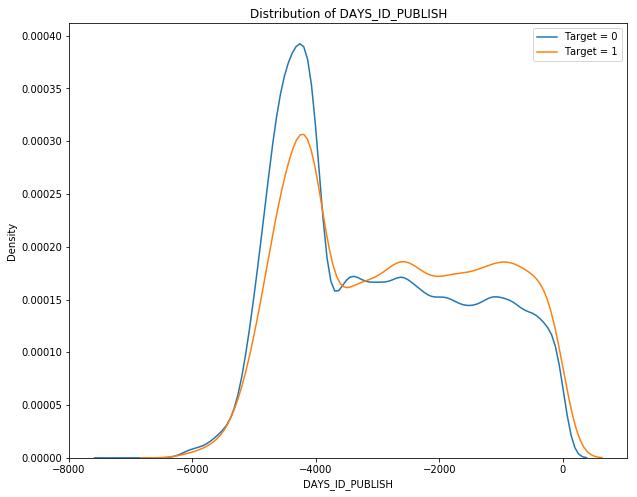

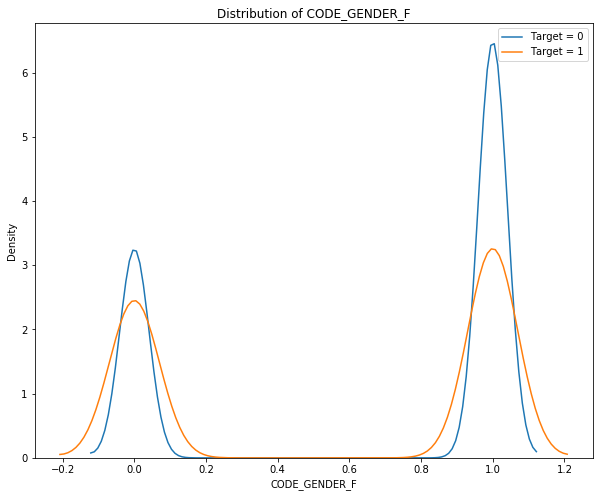

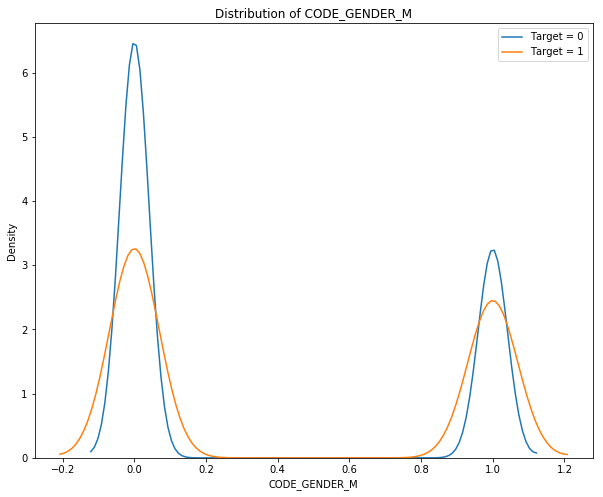

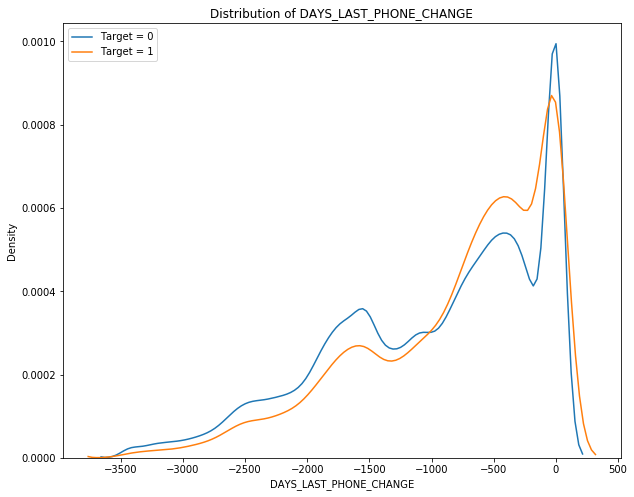

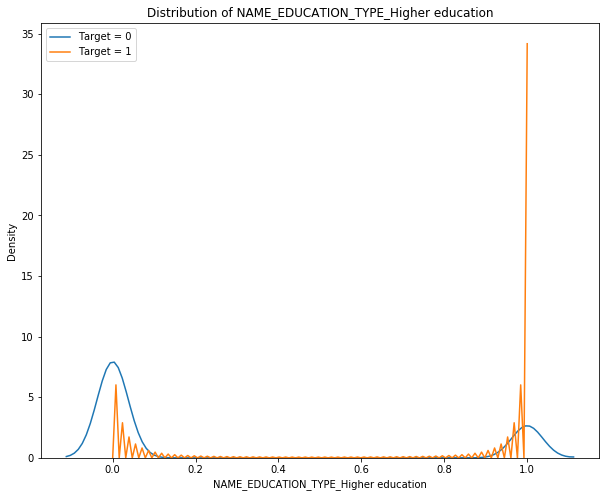

In [61]:
plt.figure(figsize = (20, 5))
for i in range(5):
    _plot_density(cols_corr_15[i])

DAYS_BIRTH is a continuous variable with a range between 20 and 70. The horizontal axis represents the age by day, the negative value represents the number of days of difference from the time of birth to the present. So young people will be on the right of the horizontal axis and the elderly will be on the left. From the chart we can see that young people tend to not pay more than older people. The evidence is in the density graph that we find the distribution skewed right. To clarify the judgment, we look at debt repayment behavior by age groups.

In [62]:
age_bin = app_train[['TARGET', 'DAYS_BIRTH']]
age_bin['YEAR_OLD'] = -app_train['DAYS_BIRTH']/365

In [63]:
#The age of bar 10 is about the same
age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))
age_bin.head()

,TARGET,DAYS_BIRTH,YEAR_OLD,DAYS_BIN
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"


Statistics on the number of non-repayment by age ranges.

In [64]:
age_bin.groupby(['DAYS_BIN']).mean()

,TARGET,DAYS_BIRTH,YEAR_OLD
DAYS_BIN,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


Chart of debt repayment rates for contracts by age group.

Text(0.5, 0, 'Not Repaid rate')

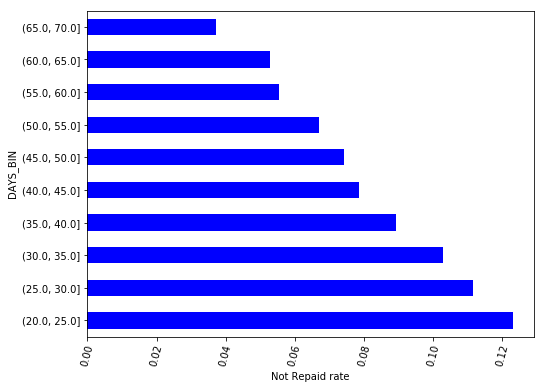

In [65]:
plt.figure(figsize = (8, 6))
age_bin.groupby(['DAYS_BIN']).mean()['TARGET'].plot.barh(color = 'b')
plt.xticks(rotation = '75')
plt.xlabel('Not Repaid rate')

The chart shows that the rate of non-repayment among people in the age group is lower than that of the lower age group. This behavior may be due to the fact that young people between 20-25 years do not have high income and savings while their family members have more savings.

# 6-Time to Regress

Finding out the Repaid / Not Repaid ratio distribution of numeric variables, logistic model seems to be obvious choice

## a-Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, TARGET)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [67]:
train_pred_prob = log_reg.predict_proba(train)[:, 1]

In [68]:
TARGET.value_counts()/TARGET.value_counts().sum()

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

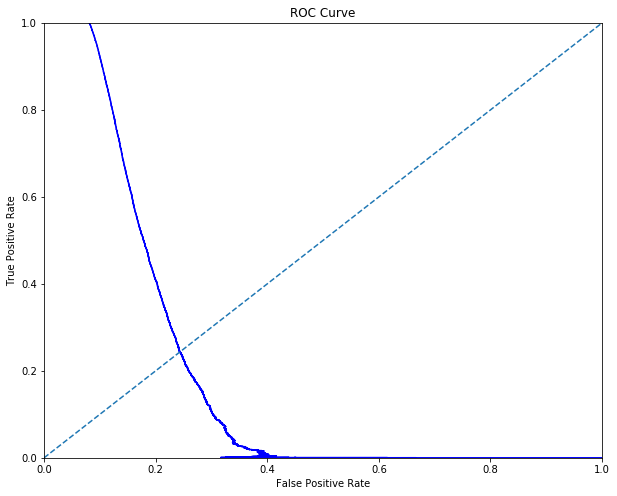

In [69]:
# ROC curve
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_roc_curve(fpr, tpr, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres)

Precision and Recall are other two alternatives.Both measure the level of accurate forecasting.<br>
Precision evaluates the exact forecast rate of bad records in the total number of cases that are forecasted to be bad.
Recall evaluates the exact bad profile forecast rate when the profile is essentially bad.
Besides, there are other indicators we can consider like F1-Score, Kappa, Gini.

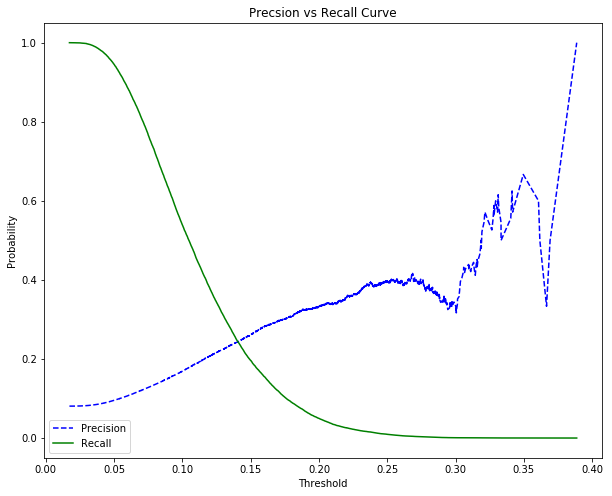

In [70]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(prec, rec, thres)

The non-protruding ROC curve above the horizontal axis indicates the classification power of the relatively weak model. The ratio of precision and recall to threshold thresholds is also not convex curves that lead to a change in threshold that can increase the trade-off between significant precision and recall rates. At each level threshold does not achieve simultaneous high precision and recall rates. Instead, you'll have to trade between high precision or high recall. This is not a good enough model to apply in practice

### Using Feature engineering
In sklearn we can easily use PolynormialFeatures ()

In [71]:
print(cols_corr_15)

['DAYS_ID_PUBLISH', 'CODE_GENDER_F', 'CODE_GENDER_M', 'DAYS_LAST_PHONE_CHANGE', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_2', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_0', 'OCCUPATION_TYPE_OCCUPATION_TYPE_1', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'TARGET']


In [72]:
from sklearn.preprocessing import PolynomialFeatures, Imputer, MinMaxScaler

# Initialize preprocessing. Inputer according to mean, minmax scaler in range 0, 1 and polynomial features level 3
inputer = Imputer(strategy = 'mean')
minmax_scaler = MinMaxScaler(feature_range = (0, 1))
poly_engineer = PolynomialFeatures(degree = 3)

In [73]:
# Get the features that are most correlated to the target variable from app_train and app_test
TARGET = app_train[cols_corr_15[-1]]
train_poly_fea = app_train[cols_corr_15[:-1]]
test_poly_fea = app_test[cols_corr_15[:-1]]

In [74]:
# input missing data
inputer = inputer.fit(train_poly_fea)
train_poly_fea = inputer.transform(train_poly_fea)
test_poly_fea = inputer.transform(test_poly_fea)

In [75]:
# Minmax data scaler
minmax_scaler = minmax_scaler.fit(train_poly_fea)
train_poly_fea = minmax_scaler.transform(train_poly_fea)
test_poly_fea = minmax_scaler.transform(test_poly_fea)

In [76]:
print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

train_poly_fea shape:  (307511, 15)
test_poly_fea shape:  (48744, 15)


In [77]:
# Polynomial features data
poly_engineer = poly_engineer.fit(train_poly_fea)
train_poly_fea = poly_engineer.transform(train_poly_fea)
test_poly_fea = poly_engineer.transform(test_poly_fea)

In [78]:
print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

train_poly_fea shape:  (307511, 816)
test_poly_fea shape:  (48744, 816)


After the feature engineering, the number of variables has increased from 15 to 816 variables

In [79]:
features = poly_engineer.get_feature_names(input_features = cols_corr_15[:-1])
features[:10]

['1',
 'DAYS_ID_PUBLISH',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_INCOME_TYPE_Working',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_2',
 'REGION_RATING_CLIENT_W_CITY']

To assess whether after implementing features engineering helps improve results, we do logistic regression according to new features.

In [80]:
from sklearn.linear_model import LogisticRegression

# Build logistic regression model with control parameter C = 0.0001
lg_reg = LogisticRegression(C = 0.0001)
lg_reg.fit(train_poly_fea, TARGET)
lg_reg

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [81]:
# Logistic probability prediction
train_pred_prob = lg_reg.predict_proba(train_poly_fea)[:, 1]

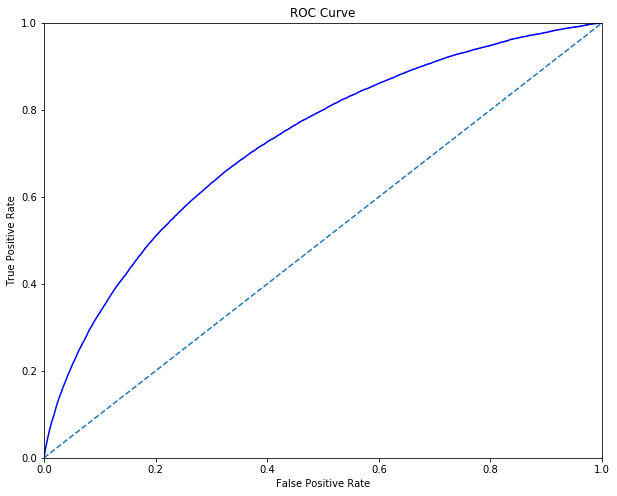

In [82]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(TARGET, train_pred_prob)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

In [83]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.7250041967217384

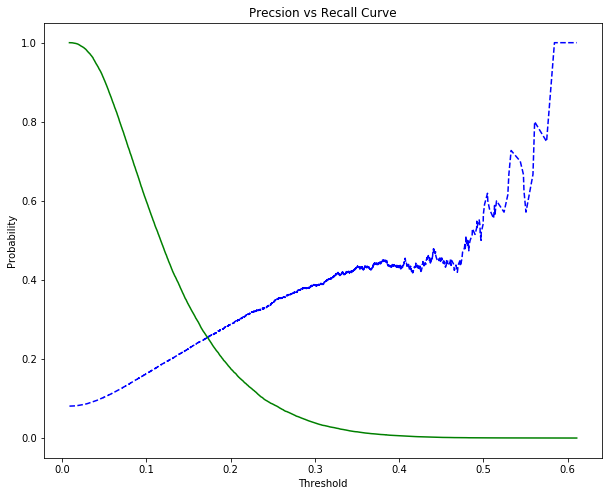

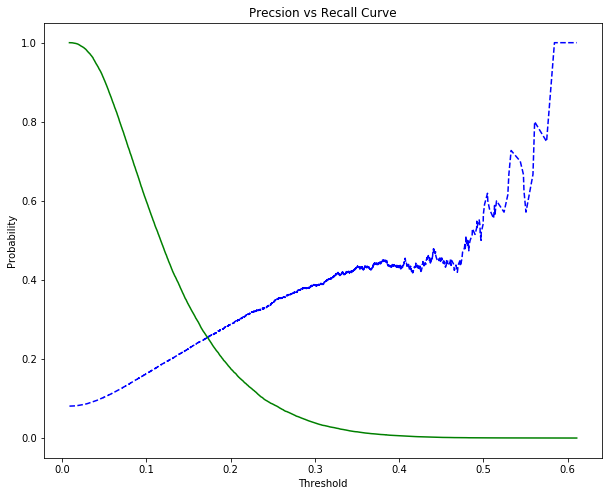

In [84]:
from sklearn.metrics import precision_recall_curve, accuracy_score

prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    return plot_pr

_plot_prec_rec_curve(prec, rec, thres)

In [85]:
# Accuracy
train_pred_label = lg_reg.predict(train_poly_fea)
accuracy_score(TARGET, train_pred_label)

0.9192841882079015

# Applying Neural network

In [86]:
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [87]:
train.shape

(307511, 171)

In [88]:
# design neural network
input_els = []
encode_els = []

# Generate a list include many Input layers

for i in range(train.shape[1]):
    # input alway have the shape (*, 1)
    input_els.append(Input(shape = (1,)))
    encode_els.append(input_els[-1])
# encode_els

In [89]:
# concatenate all layers
encode_els = concatenate(encode_els) 

# After completed the input layers, we design the hidden layers
hidden1 = Dense(units = 128, kernel_initializer = 'normal', activation = 'relu')(encode_els)
droplayer1 = Dropout(0.2)(hidden1)
hidden2 = Dense(64, kernel_initializer = 'normal', activation = 'relu')(droplayer1)
droplayer2 = Dropout(0.2)(hidden2)
outputlayer = Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')(droplayer2)

classifier = Model(input = input_els, outputs = [outputlayer])

C:\Users\Hassan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  # This is added back by InteractiveShellApp.init_path()


In [90]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_5 (I

In [91]:
from sklearn.model_selection import KFold
count = 0
kfold = KFold(n_splits = 10, shuffle = True, random_state = 12)
valid_scores = []
train_scores = []
for train_idx, valid_idx in kfold.split(train_poly_fea):
    while count < 1:
        count += 1
        # Split train, valid
        train_features, train_labels = train[train_idx], TARGET[train_idx]
        valid_features, valid_labels = train[valid_idx], TARGET[valid_idx]
        classifier.fit(
            [train_features[:, i] for i in range(train.shape[1])], #lấy list toàn bộ các cột
            train_labels,
            epochs=1,
            batch_size=128,
            shuffle=True,
            validation_data=([valid_features[:, i] for i in range(train.shape[1])], valid_labels) 
        )

Train on 276759 samples, validate on 30752 samples
Epoch 1/1
276759/276759 [==============================] - 13s 46us/step - loss: 0.2601 - acc: 0.9190 - val_loss: 0.2504 - val_acc: 0.9194


In [92]:
#FORECAST ON TRAINING data

In [93]:
train_prob_nn = classifier.predict([train[:, i] for i in range(train.shape[1])])
train_prob_nn

array([[0.35500103],
       [0.02661608],
       [0.02634659],
       ...,
       [0.06169502],
       [0.06227105],
       [0.08649965]], dtype=float32)

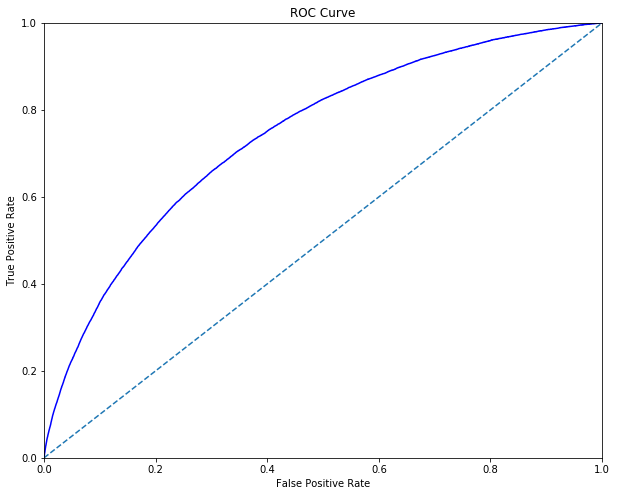

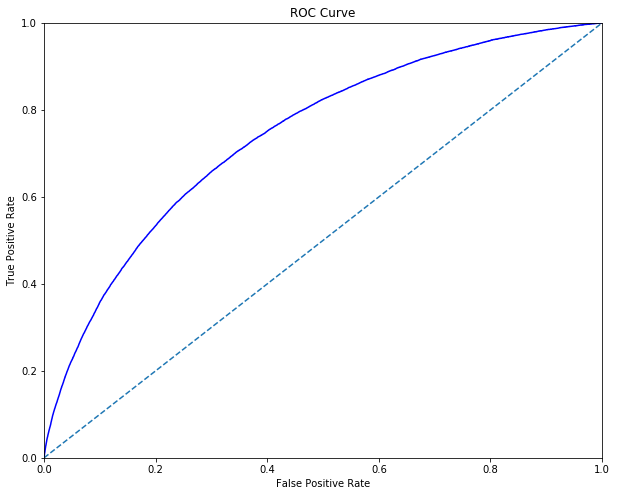

In [94]:
fpr4, tpr4, thres4 = roc_curve(TARGET, train_prob_nn)
_plot_roc_curve(fpr4, tpr4, thres4)

In [95]:
from sklearn.metrics import auc
auc(fpr4, tpr4)

0.742345272528423

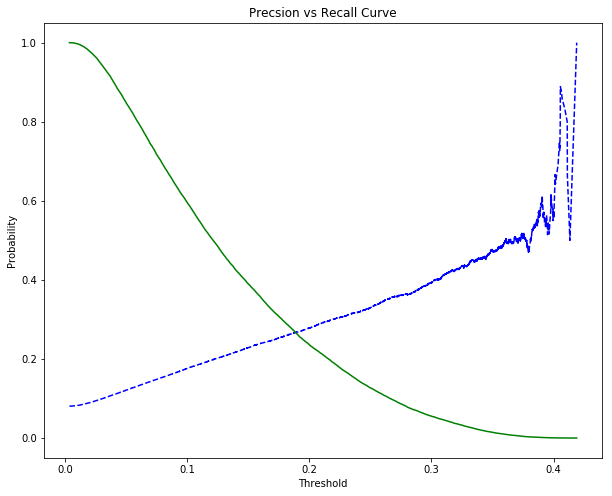

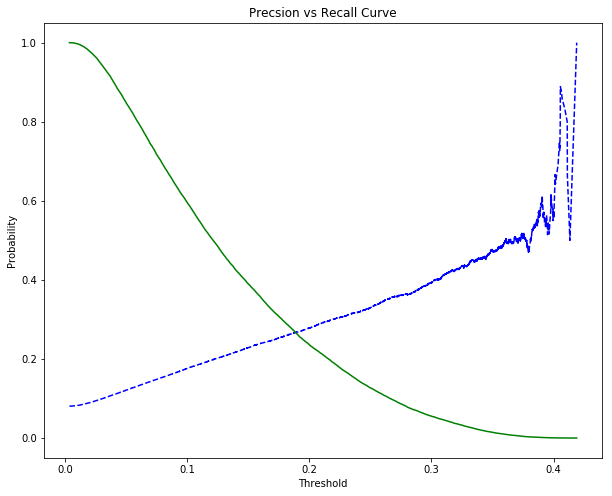

In [96]:
prec, rec, thres = precision_recall_curve(TARGET, train_prob_nn)
_plot_prec_rec_curve(prec, rec, thres)